In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Orchestra_Algorithm_30_10_18_1200 as Orchestra

986.792226310172
766.1198340968377
766.1198340968377
764.2787348069986
727.1208854457977
725.7576841878522
705.6497401699877
703.2113230222
641.339444809411
640.7393284596355
635.7318126933371
633.9472620766207
584.7175835294483
584.7175835294483
582.6467784441179
508.96134329540206
508.96134329540206
508.20515153475395
498.5267224100693
496.8197727808614
454.0291609515701
452.86990853078703
439.4786058615508
438.14294902536517
413.0663026201491
413.0663026201491
412.27147833680795
399.21343511637787
399.21343511637787
397.19974101933565
340.53469451699607
340.53469451699607
339.15129736297223
310.34695404677626
308.9901787604106
283.9084643338695
282.71142897016387
262.0072846157445
261.6353997603788
260.3047299844278
258.74221176592334
207.24640228305603
206.38486775510066
197.11195393308637
195.78540662772244
175.73306376344723
175.73306376344723
174.49629709163938
147.44495742501195
147.44495742501195
146.40997177526543
131.43869366507502
131.43869366507502
130.5973743033054
113.04

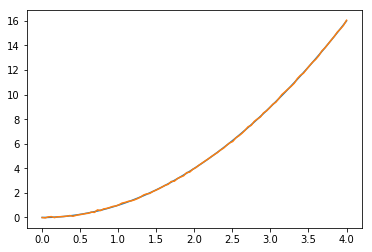

In [2]:
## Test For Pinball    

## Testing Pinball
Number_Of_Parameters = 100
Initial_Parameters = np.random.rand(Number_Of_Parameters,1)
Best_Individual = Initial_Parameters

x = np.array([np.linspace(0,4,Number_Of_Parameters)]).T
y = x**2


## Pinball HyperParameters
PreviousCost = 0
NumberOfSamples = 10
Search_Ratio = 0.7;
AmplitudeOfLinearSearch = 0.5;
AmplitudeOfRandomSearch = 0.5;
Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5;
Number_Of_Linear_Samples = int(Search_Ratio*NumberOfSamples)
Number_Of_Itterations = 5000



for i in range(0,Number_Of_Itterations):
    Suggested_Parameter_Samples_From_Pinball = Orchestra.Pinball_Optimizer(Best_Individual,NumberOfSamples,Search_Ratio,AmplitudeOfLinearSearch,AmplitudeOfRandomSearch,Linear_Search_Vector)

    Cost = np.sum((Suggested_Parameter_Samples_From_Pinball-y)**2,0)

    index_min = np.argmin(Cost)
    CurrentCost = Cost[index_min ]

    Cost_Change = CurrentCost - PreviousCost
    Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T - Best_Individual
    Best_Individual = np.array([Suggested_Parameter_Samples_From_Pinball[:,index_min]]).T



    if index_min > Number_Of_Linear_Samples:                                ## If the best vector was from the random batch
        Linear_Search_Vector = Parameter_ChangeVector                       ## Take a vector that follows the gradient
    else:                                                                   ## If no better vector is found
        Linear_Search_Vector = np.random.rand(len(Initial_Parameters),1)-0.5        ## Take a random vector

#     print(CurrentCost)

    
plt.plot(x,y)
plt.plot(x,Best_Individual)

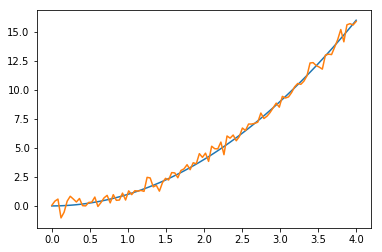

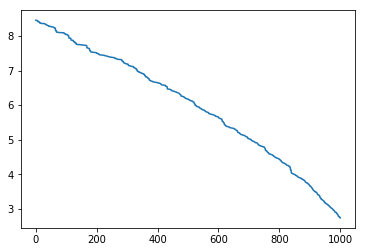

In [3]:
## Two Mode Test

Number_Of_Parameters = 100
InitialParameters = np.random.rand(Number_Of_Parameters,1)

x = np.array([np.linspace(0,4,Number_Of_Parameters)]).T
y = x**2


NumberOfSamples = 10
## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 1
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 100
RandomMultiplicationFactor = 100
SignificantChangeValue = 0.2
Maximal_Random_Search = 0.5
Number_Of_Itterations = 1000


Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
Cost_Change = 0
Cost_Vector = np.zeros(Number_Of_Itterations)
PreviousCost = np.sum((InitialParameters-y)**2)
Best_Individual = InitialParameters

for i in range(0,Number_Of_Itterations):
    Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Orchestra.Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

    Cost = np.sum((Suggested_Parameter_Samples_From_Two_Mode-y)**2,0)

    index_min = np.argmin(Cost)
    CurrentCost = Cost[index_min ]

    Cost_Change = CurrentCost - PreviousCost
    Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
    Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T
    Cost_Vector[i] = CurrentCost
    PreviousCost = CurrentCost
#     print(CurrentCost)

plt.figure(2)
plt.plot(x,y)
plt.plot(x,Best_Individual)

plt.figure(1)
itterations = np.linspace(0,Number_Of_Itterations,Number_Of_Itterations)
plt.plot(itterations,np.log(Cost_Vector))



## Return the cost vector and best indivudual

In [4]:

## Guessing Game HyperParameters
dt = 0.01;
NumberRandomVectors = 4;
NumberOfSamples_For_AverageVector = 2;
AmplitudeOf_SingleVectors = 200;
AmplitudeOf_EvenVectors = 200;
AmplitudeOf_RandomVectors = 200;

## Testin Guessing game
NumberOfSamples = 20
Initial_Parameters = np.random.rand(30,1)
Best_Individual = Initial_Parameters
x = np.array([np.linspace(0,4,30)]).T
y = x**2



for i in range (0,40):
    Suggested_Parameter_Samples_From_Guessing_Game1,LengthOfVectors,RandomVectors = Orchestra.Guessing_Game_Optimizer_Part1(Best_Individual,NumberRandomVectors,dt)

    NumberOfSamples_For_Round2 = NumberOfSamples - len(Suggested_Parameter_Samples_From_Guessing_Game1[1,:])

    CostVector = np.sum((Suggested_Parameter_Samples_From_Guessing_Game1-y)**2,0)
    Suggested_Parameter_Samples_From_Guessing_Game2 = Orchestra.Guessing_Game_Optimizer_Part2(Best_Individual,NumberRandomVectors,CostVector,dt,RandomVectors,LengthOfVectors,NumberOfSamples_For_Round2,NumberOfSamples_For_AverageVector,AmplitudeOf_SingleVectors, AmplitudeOf_EvenVectors,AmplitudeOf_RandomVectors)

    Cost = np.sum((Suggested_Parameter_Samples_From_Guessing_Game2-y)**2,0)
    index_min = np.argmin(Cost)
    CurrentCost = Cost[index_min ]
    print(CurrentCost)
    Best_Individual = np.array([Suggested_Parameter_Samples_From_Guessing_Game2[:,index_min]]).T

1321.5344128241736
1256.9546235319524
1253.2985090329266
783.1291605647508
662.508111619593
603.5853420244581
533.8383686360656
515.1758499603773
467.0726581604299
427.45146277709745
436.1323496862036
408.409315986043
394.6181025281528
385.2011382210904
372.99951958863835
343.86616011940214
325.91578219099165
291.50326869601327
279.80225883431615
286.3716288447097
263.4471683594902
269.75591011651375
229.35269845953957
231.02417254846338
196.46169359458995
191.38524016625783
180.06707404818354
174.02628024520953
170.32337874309414
175.250294973848
174.56618496401936
159.50573241731166
156.10567189933738
186.3099954322041
176.58420940039682
175.12838983313247
152.64985995719044
154.2115982238119
159.8760577917643
176.42685615998985


In [5]:

### Test of the conductor algorithm

## Resource Distribution Algorithm - HyperParameters
Initial_Resource_Allocation = np.array([60 ,60 ,60])
Current_Resource_Allocation =Initial_Resource_Allocation
Best_Change_In_CostFunction_FromAlgorithm = np.array([0 ,0 ,0])
MassVector = 10*np.array([1, 1, 1])
Self_Interaction_Spring_Constants = 5*np.array([1, 1, 1])
Neighboring_Algorithm_Interaction_Spring_Constants = 90*np.array([1, 1, 1])
Epsilon1 = 0.01

for i in range (1,20):
    Changevector = np.array([-1, 0 ,0])
    RecomendedResourceAllocation = Orchestra.Resource_Allocation_Hamiltonian(Initial_Resource_Allocation,Current_Resource_Allocation,Changevector,MassVector,Self_Interaction_Spring_Constants,Neighboring_Algorithm_Interaction_Spring_Constants,Epsilon1)
    Current_Resource_Allocation = RecomendedResourceAllocation

Minimal_Allocation = np.min(Current_Resource_Allocation)
print("Minimal_Allocation is:",Minimal_Allocation)
for i in range (1,20):
    Changevector = np.array([1,0 ,0])
    RecomendedResourceAllocation =  Orchestra.Resource_Allocation_Hamiltonian(Initial_Resource_Allocation,Current_Resource_Allocation,Changevector,MassVector,Self_Interaction_Spring_Constants,Neighboring_Algorithm_Interaction_Spring_Constants,Epsilon1)
    Current_Resource_Allocation = RecomendedResourceAllocation

Maximal_Allocation = np.max(Current_Resource_Allocation)
print("Maximal_Allocation is:",Maximal_Allocation)

Minimal_Allocation is: 24.0
Maximal_Allocation is: 96.0
